<h1>DOB ECB Fines- a brief Analysis</h1>
<h3>Are DOB Violations precautionary or just a headache?</h3>
<p>The Department of Buildings (DOB) in New York City regulates City Construction Codes, Zoning, and  Dwelling Laws for over one million construction sites and buildings in New York City. Their aim is to enforce compliance to promote safety for site workers and the public.<p> 

<p>With their annual reviews and site inspections Violations are issued across the city for a range of different infractions.</p>
<p>The dataset I reviewed is from the New York City Open Data source pertaining specifically to the DOB ECB (Enviornmental Control Board) violations. With 46 columns and millions of data points dating back to 1910.</p> 
<p>Currently I work in property management and review with ownership and Directors violations like this regularly. We have had Building Managers, Superintendents, and Porters show an inspector from the DOB that a potential infraction was a simple fix, he would then fix it onsite, in the moment and I will still receive a violation in my office which our attorney then charges us legal fees to appear in court. As many questions as I am able to answer on meeting compliance and causes of violations there is assuredly one question I have never been able to answer. <b>Does the DOB just want a Respondent’s money or are they actually looking out for the safety of he city?</b></p>
<p>I think there some hints to this question in this dataset. First, let’s look at the Violations overtime.</p>  
<h3>How many violations annually are respondents receiving?</h3>
<h4>Below you can see the DOB Violation data (violations that are adjudicated by OATH/ECB)and approximately how many violations have been issued each year since 1910.</h4>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import ttest_ind
import datetime
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#import dataset and find shape
dob = pd.read_csv('DOB_ECB_Violations.csv');
dob.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,6,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1334976, 46)

In [3]:
#data discovery
#list(dob)

In [4]:
#The date was not in a useable format
#dob.ISSUE_DATE[0:20]
#dob.ISSUE_DATE.value_counts()
dob = dob.loc[dob['ISSUE_DATE'] > 0]

In [5]:
#set Issue date to new issue date with useable format
dob['new_issue_date'] = pd.to_datetime(dob['ISSUE_DATE'], format='%Y%m%d')

Text(0, 0.5, 'DOB Violation Imposed Penalties in USD')

Text(0.5, 0, 'Date Issued')

Text(0.5, 1.0, 'Yearly Violations Issued and Estimated Cost')

([<matplotlib.axis.YTick at 0x1205a5588>,
 <a list of 8 Text yticklabel objects>)

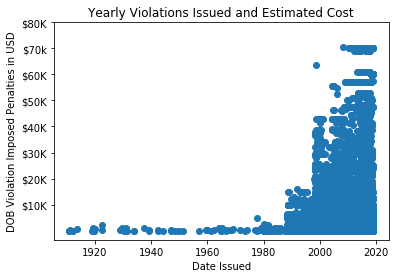

Aprox. Annual Imposed Penalty Vioaltion:  1473.416


In [6]:
#show time and imposed penalties in variables
t= dob.new_issue_date
p= dob.PENALITY_IMPOSED

#plot time and imposed penalties
plt.plot_date(x=t, y=p)

#set tick values to display USD
ytick_val =[80000, 70000, 60000, 50000, 40000, 30000, 20000, 10000]
ytick_lab=['$80K', '$70k', '$60K', '$50K', '$40K', '$30K', '$20K', '$10K']
plt.ylabel('DOB Violation Imposed Penalties in USD')
plt.xlabel('Date Issued')
plt.title('Yearly Violations Issued and Estimated Cost')
plt.yticks(ytick_val, ytick_lab)
plt.show()
print("Aprox. Annual Imposed Penalty Vioaltion: ", round(dob.PENALITY_IMPOSED.mean(),3))

<p>We can see above there was a significant increase in Violations in the 90’s moving into the 2000’s. You might also say that the DOB could be collecting substantially more (at least seven times more) in ECB fines over the last 20 years.</p>
<p>Now that we can see the increase in violations over time, let’s look closer at the imposed penalties and balances to see the benefits, if any, to the City and the cost to owners.</p> 
<h3>What are these violations costing the Respondents (Building Owners, Landlords or Tenants)?</h3>

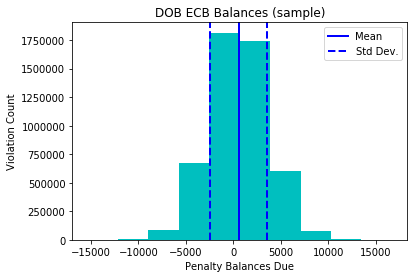

Total Balance Due: $ 752906032.67
Balance Mean: $ 564.01
Balance Median: $ 0.0
Balance Variance: $ 9064436.54
Balance Standard Deviation: $ 3010.72
Standard Error:  2.61
Minimum Balance: $ -47400.0
Maximum Balance: $ 70000.0
Balance Mode: $ 0    0.0
dtype: float64


In [7]:
#take a sample from the balance to represent the balance due
bal= np.random.normal(dob.BALANCE_DUE.mean(), dob.BALANCE_DUE.std(), 5000000)

#plot the balance
plt.hist(bal ,bins = 10, color= 'c')

#show the central tendancy and variance
plt.axvline(dob.BALANCE_DUE.mean(), color='b', linestyle='solid', linewidth=2, label='Mean')
plt.axvline(dob.BALANCE_DUE.mean() + dob.BALANCE_DUE.std(), color='b', linestyle='dashed', linewidth=2, label='Std Dev.')
plt.axvline(dob.BALANCE_DUE.mean() - dob.BALANCE_DUE.std(), color='b', linestyle='dashed', linewidth=2)

#add titles
plt.title('DOB ECB Balances (sample)')
plt.xlabel('Penalty Balances Due')
plt.ylabel('Violation Count')
plt.legend(loc='upper right')
plt.show();

print("Total Balance Due: $", round(dob.BALANCE_DUE.sum(),2))
print("Balance Mean: $",round(dob.BALANCE_DUE.mean(),2))
print("Balance Median: $", round(dob.BALANCE_DUE.median(), 2))
print("Balance Variance: $", round(np.var(dob.BALANCE_DUE),2)) 
print("Balance Standard Deviation: $", round(dob.BALANCE_DUE.std(),2))
print("Standard Error: ", round(np.std((dob.BALANCE_DUE) / np.sqrt(len(dob.BALANCE_DUE))), 2)) 
print("Minimum Balance: $", round(dob.BALANCE_DUE.min(),2))
print("Maximum Balance: $", round(dob.BALANCE_DUE.max(),2));
print("Balance Mode: $", round(dob.BALANCE_DUE.mode(),2)) ;

<p>Looking at the data there are several things to consider here. The first ting that stands out is the violation balance's standard deviation is considerably larger than the mean. The Data is clustering by the low balances, or zero balance. There are some exceptionally low negative balances due which respondents owe, or shall we say are owed. What does that tell us about the DOB issuing these violations? 
<h3>Is the DOB dismissing Violations and to what degree?</h3>


In [8]:
#Remove any nan values from Imposed Penalty and replace with 0
nan_rows = dob[dob['PENALITY_IMPOSED'].isnull()]
index = list(nan_rows.index)
for i in index:
    dob['PENALITY_IMPOSED'][i]= 0
nan_rows

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,ISN_DOB_BIS_EXTRACT,ECB_VIOLATION_NUMBER,ECB_VIOLATION_STATUS,DOB_VIOLATION_NUMBER,BIN,BORO,BLOCK,LOT,HEARING_DATE,HEARING_TIME,...,INFRACTION_CODE8,SECTION_LAW_DESCRIPTION8,INFRACTION_CODE9,SECTION_LAW_DESCRIPTION9,INFRACTION_CODE10,SECTION_LAW_DESCRIPTION10,AGGRAVATED_LEVEL,HEARING_STATUS,CERTIFICATION_STATUS,new_issue_date
747318,52791,34054780P,RESOLVE,080691CSSSTB01,3.05822e+06,3,2058,25.0,19910923,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-08-06
781801,203860,34136205H,RESOLVE,031396Z12Y02,4.26318e+06,4,12133,62.0,19960604,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-03-13
857906,153327,34132163K,RESOLVE,112295C07M0,VW,3012920,3,783.0,21,19961216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MULTIPLE OFFENSE,DISMISSED,1995-12-13
1001435,131115,34129086Z,RESOLVE,071495Z07H2,4.09789e+06,4,4045,27.0,19951010,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CURED/IN-VIO,1995-07-14
1045170,190420,34173281M,RESOLVE,021098Z10MJ20,3.37831e+06,3,6127,35.0,19980608,1030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-02-10


In [9]:
#remove any nan from Balance Due values and replace with 0 
nan_nas = dob[dob['BALANCE_DUE'].isnull()]
index = list(nan_nas.index)
for x in index:
    dob['BALANCE_DUE'][x]= 0
nan_nas

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,ISN_DOB_BIS_EXTRACT,ECB_VIOLATION_NUMBER,ECB_VIOLATION_STATUS,DOB_VIOLATION_NUMBER,BIN,BORO,BLOCK,LOT,HEARING_DATE,HEARING_TIME,...,INFRACTION_CODE8,SECTION_LAW_DESCRIPTION8,INFRACTION_CODE9,SECTION_LAW_DESCRIPTION9,INFRACTION_CODE10,SECTION_LAW_DESCRIPTION10,AGGRAVATED_LEVEL,HEARING_STATUS,CERTIFICATION_STATUS,new_issue_date
781801,203860,34136205H,RESOLVE,031396Z12Y02,4.26318e+06,4,12133,62.0,19960604,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-03-13


Text(0.5, 1.0, 'Violations with $0 (or less) Imposed Penalty')

Text(0, 0.5, 'Violation Count')

Text(0.5, 0, '$0 (or less) Imposed Penalty')

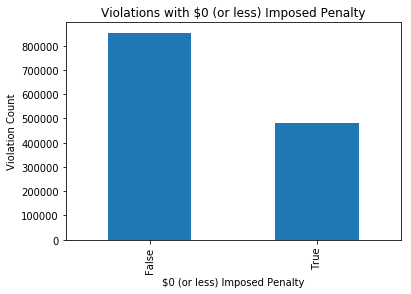

Violations with $0 (or less)Imposed Penalties:  481436
Violations with Penalties more than $0:  853476
Percentage $0 Penalty Violations:  56%


In [10]:
#calculate amount of violations with $0 imposed penalty
zero_pen= dob.loc[lambda df: dob['PENALITY_IMPOSED'] < 1 , :]
penalties = dob.loc[lambda df: dob['PENALITY_IMPOSED'] >= 1, :]

#create dataframe for boolean 
amt_due = pd.DataFrame(dob.PENALITY_IMPOSED < 1)
amt_due = pd.DataFrame(amt_due.PENALITY_IMPOSED.value_counts())

#plot boolean values
amt_due.plot(kind='bar', legend=False)
plt.title('Violations with $0 (or less) Imposed Penalty')
plt.ylabel('Violation Count')
plt.xlabel('$0 (or less) Imposed Penalty')
plt.show()
print("Violations with $0 (or less)Imposed Penalties: ", len(zero_pen))
print("Violations with Penalties more than $0: ", len(penalties))
print("Percentage $0 Penalty Violations: ",'{0:.0%}'.format(len(zero_pen)/len(penalties)))

<p>Now we can see that over 56% of the imposed penalties are 0 or less USD. I think we are on to something.<p>

Text(0.5, 1.0, 'Violations by Status')

Text(0, 0.5, 'Violation Count')

Text(0.5, 0, 'ECB Violation Status')

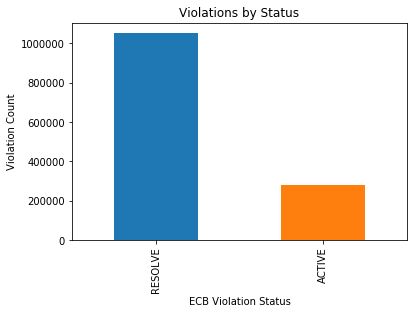

RESOLVE    1052875
ACTIVE      282037
Name: ECB_VIOLATION_STATUS, dtype: int64
RESOLVED VIOLATIONS WITH ZERO BALANCE:  998084
ACTIVE VIOLATIONS WITH ZERO BALANCE:  196436
Percentage Resolved Violations with $0 Balance:  95%
Percentage Active Violations with $0 Balance:  70%


In [11]:
#Calculate Active vs Resolved Violations (vo's) and see if resolved vos mostly have a 0 balance

#find active and resolved status
active_vos = dob.loc[lambda df: dob['ECB_VIOLATION_STATUS'] == "ACTIVE", :]
resolved_vos = dob.loc[lambda df: dob['ECB_VIOLATION_STATUS'] =='RESOLVE', :]
active_vos_zero = active_vos.loc[lambda df: active_vos['BALANCE_DUE'] == 0, :]
resolved_vos_zero= resolved_vos.loc[lambda df: resolved_vos['BALANCE_DUE'] ==0, :]


#plot in bargraph
dob.ECB_VIOLATION_STATUS.value_counts().plot(kind='bar',legend=False)
plt.title('Violations by Status')
plt.ylabel('Violation Count')
plt.xlabel('ECB Violation Status')
plt.show()

print(dob.ECB_VIOLATION_STATUS.value_counts())
print("RESOLVED VIOLATIONS WITH ZERO BALANCE: ", len(resolved_vos_zero))
print("ACTIVE VIOLATIONS WITH ZERO BALANCE: ", len(active_vos_zero))
print("Percentage Resolved Violations with $0 Balance: ",'{0:.0%}'.format(len(resolved_vos_zero)/(len(resolved_vos))))
print("Percentage Active Violations with $0 Balance: ", '{0:.0%}'.format(len(active_vos_zero)/(len(active_vos))))

<p>The status of a violation seems to have an impact on its cost to the Respondent. Accordingly, 95% of resolved Violations result in a zero balance. This could mean that if The Respondent responds by curing the violation by the cure date or appearing in court, the decision is found in favor of the Respondent 95% of the time. Possibly implying the DOB does have safety and not financial incentives.</p>

<p>Now that we have an idea on cost to Respondents, let’s compare the Imposed Penalty to the Balance Due.</p>
<h3>Is there a difference in what a Respondent owes and the Penalty Fee?</h3>

(array([1.60000e+01, 7.36000e+02, 1.96630e+04, 1.80301e+05, 6.08089e+05,
        7.64106e+05, 3.59812e+05, 6.30840e+04, 4.09700e+03, 9.60000e+01]),
 array([-15778.90463228, -12657.13252518,  -9535.36041809,  -6413.58831099,
         -3291.81620389,   -170.04409679,   2951.72801031,   6073.5001174 ,
          9195.2722245 ,  12317.0443316 ,  15438.8164387 ]),
 <a list of 10 Patch objects>)

(array([5.00000e+00, 6.66000e+02, 1.74860e+04, 1.75182e+05, 6.15140e+05,
        7.78028e+05, 3.52632e+05, 5.75680e+04, 3.22200e+03, 7.10000e+01]),
 array([-18372.10469762, -14576.16098396, -10780.2172703 ,  -6984.27355663,
         -3188.32984297,    607.61387069,   4403.55758436,   8199.50129802,
         11995.44501168,  15791.38872534,  19587.33243901]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'ECB Violtation Balance vs Imposed Penalties of 2 Million Violations')

Text(0.5, 0, 'Amount in USD')

Text(0, 0.5, 'Violation Count')

([<matplotlib.axis.XTick at 0x130069fd0>,
 <a list of 7 Text xticklabel objects>)

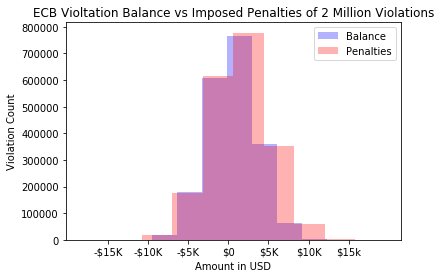

Average Balance: $ 560.03
Std Dev of Balances: $ 3010.42
Std Error of Balances Due:  2.13
Maximum Balance Due: $ 15438.82
Average Penalty Imposed: $ 1474.84
Std Dev of Penalties: $ 3584.0
Std Error of Imposed Penalties:  2.53
Maximum Penalty Imposed: $ 19587.33
Ttest_indResult(statistic=276.39679517436343, pvalue=0.0)


In [12]:
#find samples from both balance and imposed penalty amounts
j= np.random.normal(dob.BALANCE_DUE.mean(), dob.BALANCE_DUE.std(), 2000000)
k = np.random.normal(dob.PENALITY_IMPOSED.mean(), dob.PENALITY_IMPOSED.std(), 2000000)


#plot two histograms
plt.hist(j, color='blue',bins=10,  alpha=0.3, label='Balance')
plt.hist(k, color='red',bins=10, alpha=0.3 , label='Penalties')
plt.title("ECB Violtation Balance vs Imposed Penalties of 2 Million Violations")
xtick_val =[15000, 10000, 5000, 0, -5000, -10000, -15000]
xtick_lab=['$15k', '$10K', '$5K', '$0', '-$5K', '-$10K', '-$15K']
plt.xlabel('Amount in USD')
plt.ylabel('Violation Count')
plt.xticks(xtick_val, xtick_lab)
plt.legend(loc='upper right')
plt.show()
print("Average Balance: $", round(j.mean(),2))
print("Std Dev of Balances: $", round(j.std(),2))
print("Std Error of Balances Due: ",round(np.std((j) / np.sqrt(len(j))), 2))
print("Maximum Balance Due: $", round(j.max(),2))
print("Average Penalty Imposed: $", round(k.mean(),2))
print("Std Dev of Penalties: $", round(k.std(),))
print("Std Error of Imposed Penalties: ",round(np.std((k) / np.sqrt(len(k))), 2))
print("Maximum Penalty Imposed: $", round(k.max(),2))
print(ttest_ind(k, j, equal_var=False))

<p>If we look at a sample of 2 Million violations we can see that the variance in both the Imposed Penalties and Balances are similar, in that they still cluster toward the zero balance.</p>

<p>If we recall earlier when we looked at the status of a violtion, we discovered that 95% of resolved violations carry a zero balance. Let's take a closer look.</p>
<h3>What is the Balance Due based on the Status of the Violation?</h3>

(array([3.00000e+01, 1.59000e+03, 2.94740e+04, 2.15897e+05, 6.27860e+05,
        7.25887e+05, 3.33639e+05, 6.11610e+04, 4.30700e+03, 1.55000e+02]),
 array([-25668.7312657 , -20310.0381557 , -14951.34504569,  -9592.65193569,
         -4233.95882568,   1124.73428432,   6483.42739432,  11842.12050433,
         17200.81361433,  22559.50672433,  27918.19983434]),
 <a list of 10 Patch objects>)

(array([3.60000e+01, 2.15100e+03, 3.97410e+04, 2.72203e+05, 7.02465e+05,
        6.87728e+05, 2.57531e+05, 3.61710e+04, 1.93600e+03, 3.80000e+01]),
 array([-8839.41847373, -7026.69545638, -5213.97243903, -3401.24942168,
        -1588.52640433,   224.19661302,  2036.91963037,  3849.64264772,
         5662.36566508,  7475.08868243,  9287.81169978]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Amount in USD')

Text(0.5, 1.0, 'Violation Balances Based on Status (sample of 2 million)')

Text(0.5, 0, 'Balance Due')

Text(0, 0.5, 'Violation Count')

([<matplotlib.axis.XTick at 0x11e88b780>,
 <a list of 5 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x11e8904e0>,
 <a list of 7 Text yticklabel objects>)

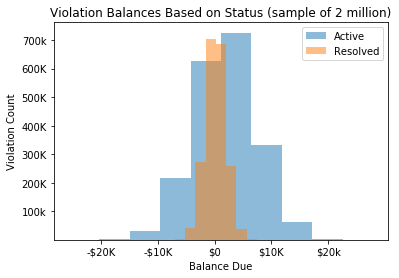

Total Balance Due for ALL Active Violations: $ 554843592.6
Average Balance Due for Active Violations(sample): $ 1968.83
Std Dev of Balances for Active Violations(sample): $ 5361.51
Std Error for Active Violations(sample):  3.79
Maximum Balance Due for Active Violations(sample): $ 27918.2
Total Balance Due for ALL Resolved Violations: $ 198062440.07
Average Balance Due for Resolved Violations(sample): $ 188.81
Std Dev of Balances for Resolved Violations(sample): $ 1766.0
Std Error for Resolved Violations(sample):  1.25
Maximum Balance Due for Resolved Violations(sample): $ 9287.81
Difference between Resolved and Active Violations(sample):  1780.01
Ttest_indResult(statistic=445.95419741658037, pvalue=0.0)


In [13]:
#find the active and resolved status and balances
active = dob[dob["ECB_VIOLATION_STATUS"] == "ACTIVE"]['BALANCE_DUE']
resolved= dob[dob['ECB_VIOLATION_STATUS']== 'RESOLVE']['BALANCE_DUE']

#take a sample from the violations for better visuals
b= np.random.normal(active.mean(), active.std(), 2000000)
c= np.random.normal(resolved.mean(), resolved.std(), 2000000)

#plot the data
plt.hist(b, alpha= 0.5, label= 'Active')
plt.hist(c, alpha= 0.5, label= 'Resolved')

xtick_val =[20000, 10000,  0,  -10000, -20000]
xtick_lab=['$20k', '$10K',  '$0', '-$10K', '-$20K']
ytick_val =[700000, 600000,  500000,  400000, 300000, 200000, 100000]
ytick_lab=['700k', '600K',  '500K', '400K', '300K', '200K', '100k']
plt.xlabel('Amount in USD')
plt.title('Violation Balances Based on Status (sample of 2 million)')
plt.xlabel('Balance Due')
plt.ylabel('Violation Count')
plt.xticks(xtick_val, xtick_lab)
plt.yticks(ytick_val, ytick_lab)
plt.legend(loc='upper right')
plt.show();

#display values for ttest and to show actual numbers
print("Total Balance Due for ALL Active Violations: $", round(sum(active),2))
print("Average Balance Due for Active Violations(sample): $", round(b.mean(),2))
print("Std Dev of Balances for Active Violations(sample): $", round(b.std(),2))
print("Std Error for Active Violations(sample): ",round(np.std((b) / np.sqrt(len(b))), 2))
print("Maximum Balance Due for Active Violations(sample): $", round(b.max(),2))
print("Total Balance Due for ALL Resolved Violations: $", round(sum(resolved),2))
print("Average Balance Due for Resolved Violations(sample): $", round(c.mean(),2))
print("Std Dev of Balances for Resolved Violations(sample): $", round(c.std(),))
print("Std Error for Resolved Violations(sample): ",round(np.std((c) / np.sqrt(len(c))), 2))
print("Maximum Balance Due for Resolved Violations(sample): $", round(c.max(),2))
print("Difference between Resolved and Active Violations(sample): ",round(b.mean()-c.mean(),2))
print(ttest_ind(b, c, equal_var=False))

<p>As we can see, Violations that remain “Active” hold a considerably higher balance due than violations with the status “Resolved”.</p>

<h4>Let's review the numbers again.</h4>

In [14]:

print("Total Imposed Penalties: $", round(dob.PENALITY_IMPOSED.sum(),2))
print("Penalties Mean: $",round(dob.PENALITY_IMPOSED.mean(),2))
print("Penalties Standard Deviation: $", round(dob.PENALITY_IMPOSED.std(),2))
print("Penalties Standard Error: ", round(np.std((dob.PENALITY_IMPOSED) / np.sqrt(len(dob.PENALITY_IMPOSED))), 2)) 
print("Minimum Penalties: $", dob.PENALITY_IMPOSED.min())
print("Maximum Penalties: $", dob.PENALITY_IMPOSED.max());

Total Imposed Penalties: $ 1966873016.44
Penalties Mean: $ 1473.41
Penalties Standard Deviation: $ 3584.33
Penalties Standard Error:  3.1
Minimum Penalties: $ 0.0
Maximum Penalties: $ 70550.0


<p>Above is a review of all imposed penalties from DOB ECB violations.</p>

In [15]:
print("Total Balance Due: $", round(dob.BALANCE_DUE.sum(),2))
print("Balance Mean: $",round(dob.BALANCE_DUE.mean(),2))
print("Balance Standard Deviation: $", round(dob.BALANCE_DUE.std(),2))
print("Balance Standard Error: ", round(np.std((dob.BALANCE_DUE) / np.sqrt(len(dob.BALANCE_DUE))), 2)) 
print("Minimum Balance: $", dob.BALANCE_DUE.min())
print("Maximum Balance: $", dob.BALANCE_DUE.max())

Total Balance Due: $ 752906032.67
Balance Mean: $ 564.01
Balance Standard Deviation: $ 3010.72
Balance Standard Error:  2.61
Minimum Balance: $ -47400.0
Maximum Balance: $ 70000.0


Now we get a clear picture of the Balance due for all DOB ECB violations in NYC.

In [16]:
print("Total Active Violations Balance Due: $", round(sum(active),2))
print("Active Violations Balance Mean: $", round(active.mean(), 2))
print("Active Violations Balance Standard Deviation: $", round(active.std(),2))
print("Active Violations Balance Max: $", active.max())

Total Active Violations Balance Due: $ 554843592.6
Active Violations Balance Mean: $ 1967.27
Active Violations Balance Standard Deviation: $ 5364.28
Active Violations Balance Max: $ 70000.0


<p>Here we can see a summary of the Active DOB ECB Violations.</p>

In [17]:
print("Total Resolved Violations Balance Due: $", sum(resolved))
print("Resolved Penalties Mean: $", round(resolved.mean(),2)) 
print("Resolved Penalties Standard Deviation: $", round(resolved.std(),2))
print("Resolved Penalties Max: $", resolved.max())

Total Resolved Violations Balance Due: $ 198062440.06999972
Resolved Penalties Mean: $ 188.12
Resolved Penalties Standard Deviation: $ 1765.11
Resolved Penalties Max: $ 70000.0


<p> This accounts for the resolved DOB ECB violation penalties.</p>

<h5>To summarize, we discovered that a majority of DOB ECB violations result with 0 or no penalties. Furthermore we find that more violations are resolved than active which the active violations seem to be the most valuable or costly to Respondents. I think with this information it is a safe conclusion that the Department Of Buildings in New York City with a 95% chance of dismissing violations or finding in favor of the Respondent once in compliance, shows that they are not seeking financial incentives, but that in fact they do have the city’s safety as its number one priority.</h5>

<h2>There are so many additional questions we could consider to validate this. Below are a few questions worth exploring in the near future:</h2>

<ul>
    <li>What is the frequency of violations (inspections) based on the time of year?</li>
    <li>Do inspectors, or the DOB target specific areas, Boros, blocks?</li>
    <li>Are certain inspectors repeating or trageting citations or infractions?</li>
    <li>Is the respondent an NYC resident?</li>
    <li>Does the severity of the violation have any weight on the violation?</li>
    <li>What is the average amount of infractions per violation?</li>
    <li>What is the averge amount of violations per respondent?</li>
    <li>What is the average amount of violations per BIN, Boro, or Block?</li>
